In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def grad_descent(x, y, alpha=0.08, min_step=0.001, max_iters=1000):

    m = len(x)

    curr_a = 0
    curr_b = 0
    cost = 0

    logs = {"iter": [], "slope": [], "cost": [], "diff_a": [], "diff_b": []}

    for i in range(max_iters):

        prev_a = curr_a
        prev_b = curr_b

        y_pred = curr_a*x + curr_b

        ad = -(2/m)*sum(x*(y-y_pred))
        bd = -(2/m)*sum(y-y_pred)

        curr_a = curr_a - alpha * ad   
        curr_b = curr_b - alpha * bd

        cost = (1/m)*sum((y-y_pred)**2)

    #     print("iteration:", i, "\nslope:", curr_a, "\ncost:", cost) 

        logs["iter"].append(i)
        logs["slope"].append(curr_a)
        logs["cost"].append(cost)
        logs["diff_a"].append(curr_a - prev_a)
        logs["diff_b"].append(curr_b - prev_b)
        
        if abs(curr_a - prev_a) < min_step and abs(curr_b - prev_b) < min_step:
            print("local minimum:", curr_a, curr_b)
            break
            
    y_pred = curr_a*x + curr_b
            
    return logs, x, y, y_pred

In [3]:
def plot_results(logs, x, y, y_pred):

    plt.figure(figsize=(15,4))

    plt.subplot(1,3,1)
    plt.plot(logs["iter"],logs["slope"])
    plt.xlabel("iteration")
    plt.ylabel("slope")

    plt.subplot(1,3,2)
    plt.plot(logs["iter"],logs["cost"])
    plt.yscale("log")
    plt.xlabel("iteration")
    plt.ylabel("log cost")

    plt.subplot(1,3,3)
    plt.plot(x, y_pred)
    plt.xlabel("x")
    plt.ylabel("y pred")
    plt.scatter(x, y)

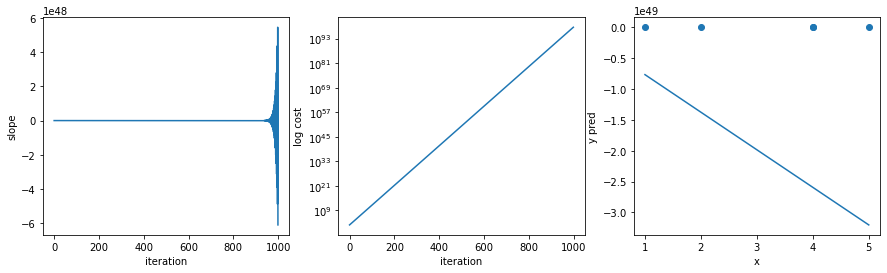

In [5]:
x = np.array([1,2,4,4,5])
y = np.array([5,7,8,11,13])

logs, x, y, y_pred = grad_descent(x,y)
plot_results(logs, x, y, y_pred)

local minimum: 1.8574589406152995 2.806409876339371


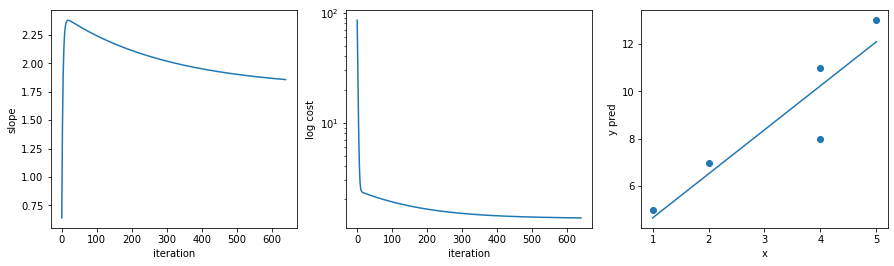

In [6]:
x = np.array([1,2,4,4,5])
y = np.array([5,7,8,11,13])

logs, x, y, y_pred = grad_descent(x,y,alpha=0.01)
plot_results(logs, x, y, y_pred)